## Reference




*   [1](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)


*   [2](http://deeplearning.cs.cmu.edu/)

* [3](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.md)


*  [4](https://github.com/yunjey/pytorch-tutorial)



## Imports

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

## Tensors

Constructing a tensor directly from data:

In [0]:
x = torch.tensor([1, 2, 3, 4])

We may check the data type, shape and device of tensor as follows:

In [0]:
print('dtyep = ', x.dtype)
print('shape = ', x.shape)
print('shape = ',  x.size())
print('device = ', x.device)

dtyep =  torch.int64
shape =  torch.Size([4])
shape =  torch.Size([4])
device =  cpu


Let's change the dtype of tensors to float32:



In [0]:
x = x.to(torch.float32)
print(x.dtype)

torch.float32


Let's put the tensor on GPU. We first check whether the GPU is availabel

In [0]:
print(torch.cuda.is_available())

True


In [0]:
x = x.to('cuda')
print('device = ', x.device)

device =  cuda:0


<font color='red'> **Q 1** </font> :  **Put x back on CPU and change its dtype to int16**.





In [0]:
x = x.to('cpu', torch.int16)
print(x)

tensor([1, 2, 3, 4], dtype=torch.int16)


<font color='red'> **Q 2** </font> : **Convert x to a numpy array.**



In [0]:
y = x.numpy()
print(y)

[1 2 3 4]


We can change the shape of tensors as follows:

In [0]:
x = x.view([2, 2])
print(x)

tensor([[1, 2],
        [3, 4]], dtype=torch.int16)


Now x is a $2\times2$  tensor.

We may also use creation operators to define and initialize tensors:

In [0]:
torch.zeros(2, 3) 

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [0]:
torch.ones(2, 2)

tensor([[1., 1.],
        [1., 1.]])

In [0]:
torch.arange(1, 4)

tensor([1, 2, 3])

In [0]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [0]:
torch.randn(2, 3)

tensor([[ 0.7681,  0.1557,  0.1723],
        [ 0.0820,  0.5680, -0.0577]])

<font color='red'> **Q 3** </font> : **Initialize x and y cuda tensors with shape [4, 3] and [2, 6] according to uniform distribution on the interva [0, 1). Reshpae y according to x's shape.**





In [0]:
x = torch.rand([4, 3], device='cuda')
print(x)
y = torch.rand([2, 6], device='cuda')
print(y)
y = y.view(x.shape)
print(y)

tensor([[0.3386, 0.1887, 0.5383],
        [0.5860, 0.0036, 0.9778],
        [0.3388, 0.4781, 0.6507],
        [0.3954, 0.4795, 0.9900]], device='cuda:0')
tensor([[0.6402, 0.9359, 0.4690, 0.3798, 0.1698, 0.8238],
        [0.8233, 0.1483, 0.4389, 0.3957, 0.0377, 0.5186]], device='cuda:0')
tensor([[0.6402, 0.9359, 0.4690],
        [0.3798, 0.1698, 0.8238],
        [0.8233, 0.1483, 0.4389],
        [0.3957, 0.0377, 0.5186]], device='cuda:0')


 ***Operations on tensors.***

<font color='red'> **Q 4** </font> : **Create two tensors x, y with  random integer in the range=[0, 10) and size=10000. How much percent of their elements are equvalent?**

In [0]:
x = torch.randint(low=0, high=10, size=(1000,))
y = torch.randint(low=0, high=10, size=(1000,))
percent = x.eq(y).sum().to(torch.float32) / x.shape[0]
print(percent)

tensor(0.0920)


<font color='red'> **Q 5** </font> : **Normalize a random vector with size=10 ?**


In [0]:
x = torch.rand(10)
x_normalized = (x - x.mean()) / x.std()
print(x)
print(x_normalized.mean())
print(x_normalized.std())

tensor([0.0520, 0.8545, 0.1653, 0.0119, 0.3630, 0.0105, 0.4971, 0.7823, 0.3975,
        0.5079])
tensor(8.9407e-09)
tensor(1.)


<font color='red'> **Q 6** </font> :**Multiply a 5x3 matrix by a 3x2 matrix.**


In [0]:
Z = torch.mm(torch.ones((5,3)), torch.ones((3,2)))
print(Z)

tensor([[3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.]])


<font color='red'> **Q 7** </font> : **Given a 1D array**


> x = torch.arange(0, 10)

**negate all elements which are between 3 and 8, in place.**

In [0]:
x = torch.arange(0, 10)
x[(3 < x) & (x <= 8)] *= -1
x

tensor([ 0,  1,  2,  3, -4, -5, -6, -7, -8,  9])

<font color='red'> **Q 8** </font> : **Create a random vector of size 10 and sort it**

In [0]:
Z = torch.rand(10)
sort = Z.sort()
print(sort)

torch.return_types.sort(
values=tensor([0.1831, 0.3548, 0.4489, 0.5579, 0.5699, 0.6755, 0.7212, 0.8219, 0.8316,
        0.9697]),
indices=tensor([7, 0, 6, 5, 4, 1, 9, 2, 3, 8]))


<font color='red'> **Q 9** </font> :**Create random vector of size 10 and replace the maximum value by 0**



In [0]:
Z = torch.rand(10)
Z[Z.argmax()] = 0
print(Z)

tensor([0.4725, 0.0000, 0.5736, 0.2089, 0.6754, 0.8530, 0.3945, 0.0621, 0.8114,
        0.6403])


<font color='red'> **Q 10** </font> : **Given the following tensors**


> x = torch.rand(100, 4)

> w = torch.rand(8, 4)

> b = torch.rand(8)

**compute**:
> y = w * x + b 




In [0]:
x = torch.rand(10, 4)
w = torch.rand(4, 8)
b = torch.rand(8)
z = torch.mm(x, w) + b
print(z.shape)

torch.Size([10, 8])


## Autograd:

Pytorch provides automatic differentiation for all operations on Tensors. Create a tensor and set requires_grad=True to track gradients

In [0]:
x = torch.ones(1, requires_grad=True)
print(x)

tensor([1.], requires_grad=True)


Do a tensor operation:

In [0]:
y = x**3
print(y)

tensor([1.], grad_fn=<PowBackward0>)


Let's compute the gradient of y with respect to x

In [0]:
y.backward()
print(x.grad)

tensor([3.])


<font color='red'> **Q 11** </font> : **Given the following variables**

> x = 1.

> w = 2.

> b = 3.

**compute the gradients  of z = w * x + b with respect to x, w and b.** 

In [0]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
z = x * w + b
z.backward()

print(x.grad)   
print(w.grad)    
print(b.grad)    

tensor(2.)
tensor(1.)
tensor(1.)


##  Optimization

torch.optim is a package implementing various optimization algorithms. It works like this


>```
for i in range(....):
    optimizer.zero_grad()
    get objective_function 
    objective_function.backward()
    optimizer.step()
```


<font color='red'> **Q 12** </font> :**Compute the minimum of** $f(x) = 2 x^2 - 4 x $

In [0]:
x = torch.rand(1, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1)
for i in range(200):
    optimizer.zero_grad()
    f = 2 * x**2 - 4 * x
    f.backward()
    optimizer.step()

print(f)
print(x)

tensor([-2.], grad_fn=<SubBackward0>)
tensor([1.0000], requires_grad=True)


## Curve Fittiing

Now we build a linea model for a toy dataset

In [0]:
x_train = torch.tensor([[3.2], [4.4], [5.5], [6.71], [6.93]])

y_train = torch.tensor([[1.7], [2.1], [2.8], [3.19], [3.694]])

We fit a linear line $y = w x + b$ to the data points. 



In [0]:
w = torch.rand([1, 1], requires_grad=True)
b = torch.rand([1], requires_grad=True)

In [0]:
optimizer = torch.optim.SGD([w, b], lr=0.01)
criterion = torch.nn.MSELoss() #  mean squared error
for i in range(10):
  optimizer.zero_grad()
  outputs = torch.matmul(x_train, w) + b
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()
  print('loss = ', loss.item())
  print('----------')

loss =  2.5221025943756104
----------
loss =  0.37088707089424133
----------
loss =  0.07690443098545074
----------
loss =  0.036709558218717575
----------
loss =  0.03119436278939247
----------
loss =  0.030418135225772858
----------
loss =  0.03028954192996025
----------
loss =  0.030249496921896935
----------
loss =  0.03022160939872265
----------
loss =  0.03019547648727894
----------


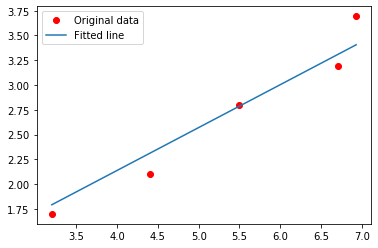

In [0]:

# Plot the graph
predicted = outputs.detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()

## Datasets

In [0]:
train_dataset = torchvision.datasets.MNIST(root='./data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

9920512it [00:01, 8808492.12it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135400.10it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2217987.09it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 50882.21it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([1, 28, 28])
5


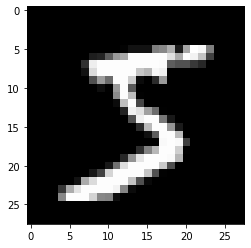

In [0]:
plt.imshow(image[0].numpy(), cmap='gray')
plt.show()

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

<font color='red'> **Q 13** </font> : **Build a linear classifier on GPU for MNIST and compute its accuracy.**

In [0]:
w = torch.rand([28*28, 10], requires_grad=True, device='cuda')
b = torch.zeros([10], requires_grad=True, device='cuda')
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64)


In [0]:
optimizer = torch.optim.SGD([w, b], lr=0.05)
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
for epoch in range(epochs):
  total_loss = 0.0
  for images, labels in train_loader:
      images = images.to('cuda')
      labels = labels.to('cuda')
      optimizer.zero_grad()
      outputs = torch.matmul(images.view(-1, 28*28), w) + b
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()

  print('epoch = {}, loss = {} '.format(epoch, total_loss/len(train_loader)))
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to('cuda')
          labels = labels.to('cuda')
          outputs = torch.matmul(images.view(-1, 28*28), w) + b
          _, pred = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (pred == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))
  print('------------------------------------------------------------')

epoch = 0, loss = 0.8003926062062859 
Accuracy of the network on the 10000 test images: 85 %
------------------------------------------------------------
epoch = 1, loss = 0.44161925730166407 
Accuracy of the network on the 10000 test images: 88 %
------------------------------------------------------------
epoch = 2, loss = 0.3915006929813926 
Accuracy of the network on the 10000 test images: 89 %
------------------------------------------------------------
epoch = 3, loss = 0.36599346838081315 
Accuracy of the network on the 10000 test images: 90 %
------------------------------------------------------------
epoch = 4, loss = 0.3498116826960273 
Accuracy of the network on the 10000 test images: 90 %
------------------------------------------------------------
epoch = 5, loss = 0.3380204312709857 
Accuracy of the network on the 10000 test images: 90 %
------------------------------------------------------------
epoch = 6, loss = 0.3291986277108508 
Accuracy of the network on the 10000